In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [145]:
!wget https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/painel.png

--2023-02-26 21:26:38--  https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/painel.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337987 (330K) [image/png]
Saving to: ‘painel.png.3’

painel.png.3        100%[===================>] 330.07K  --.-KB/s    in 0.04s   

2023-02-26 21:26:38 (7.94 MB/s) - ‘painel.png.3’ saved [337987/337987]



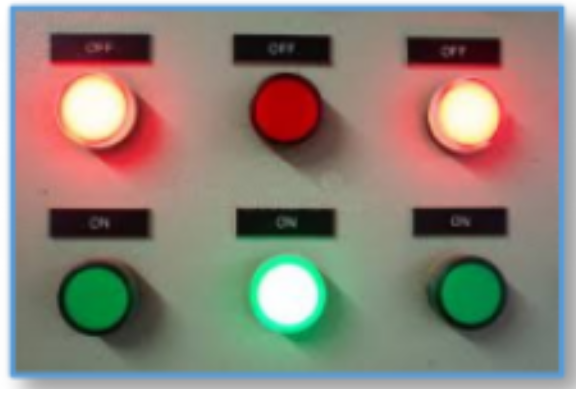

In [146]:
img = cv.imread('painel.png')
cv2_imshow(img)

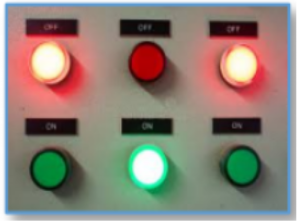

In [147]:
img = cv.resize(img,[300,224])
cv2_imshow(img)

In [148]:
img.shape

(224, 300, 3)

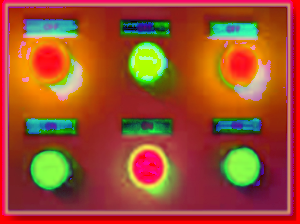

In [215]:
img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

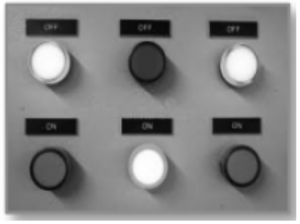

In [150]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [151]:
img_res = img.copy()

In [152]:
circles = np.squeeze(cv.HoughCircles(img_gray, 
                         cv.HOUGH_GRADIENT,
                         1, 
                         img_gray.shape[0] / 8,
                         param1=40, 
                         param2=40,
                         minRadius=20, 
                         maxRadius=130))
for i in range(0,len(circles)):
  x = circles[i][0]
  y = circles[i][1]
  raio = circles[i][2]

  cv.circle(img_res,(int(x),int(y)),int(raio),(255,0,0),5)
  cv.circle(img_res,(int(x),int(y)),3,(255,0,0),3)

In [153]:
circles

array([[239.5, 166.5,  21. ],
       [145.5, 166.5,  22.1],
       [ 54.5, 168.5,  21.6],
       [ 48.5,  62.5,  21.3],
       [143.5,  62.5,  22.2],
       [241.5,  64.5,  21.8]], dtype=float32)

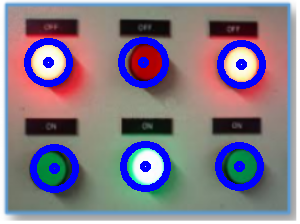

In [154]:
cv2_imshow(img_res)

In [155]:
circles_on = []
for i in range(0,len(circles)): 
  x = circles[i][0]
  y = circles[i][1]
  raio = circles[i][2]

  if img_gray[round(y),round(x)] > 230:
    cv.circle(img_res,(int(x),int(y)),int(raio),(0,255,0),5)
    circles_on.append((x,y,raio))

In [156]:
circles_on

[(145.5, 166.5, 22.1), (48.5, 62.5, 21.3), (241.5, 64.5, 21.8)]

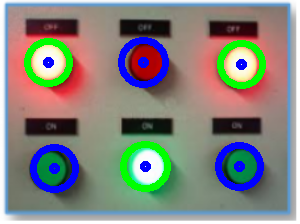

In [157]:
cv2_imshow(img_res)

In [158]:
circles_on = sorted(circles_on, key=lambda x: x[0])
circles_on = np.array(circles_on)

In [159]:
circles_on

array([[ 48.5,  62.5,  21.3],
       [145.5, 166.5,  22.1],
       [241.5,  64.5,  21.8]], dtype=float32)

In [266]:

green_mask = cv.inRange(img, (55,138,1),(255, 254, 249))
red_mask = cv.inRange(img, (2,0,177), (241,254,254))

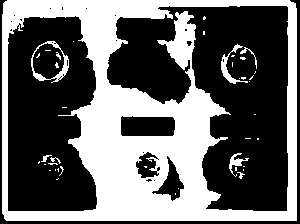

In [267]:
cv2_imshow(green_mask)

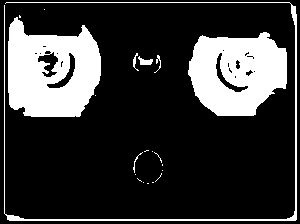

In [268]:
cv2_imshow(red_mask)

In [257]:
print('Green_circles: ')
print(circles[0])
print(circles[1])
print(circles[2])

Green_circles: 
[239.5 166.5  21. ]
[145.5 166.5  22.1]
[ 54.5 168.5  21.6]


In [258]:
print('Green colors: ')
print(img[167][240])
print(img[167][146])
print(img[169][55])

Green colors: 
[ 73 141   0]
[255 254 249]
[ 55 138   1]


In [260]:
print('Red colors: ')
print(img[63][49])
print(img[63][144])
print(img[65][242])

Red colors: 
[241 254 254]
[  2   0 177]
[239 254 251]


In [259]:
print('Red_circles: ')
print(circles[3])
print(circles[4])
print(circles[5])

Red_circles: 
[48.5 62.5 21.3]
[143.5  62.5  22.2]
[241.5  64.5  21.8]


In [275]:
estado =[]
##Detecção de cores:
for i in range(0,len(circles_on)):
  point_x = circles_on[i][0]
  point_y = circles_on[i][1]
  radius = circles_on[i][2]
  if red_mask[round(point_y)][round(point_x-radius)] == 255:
    estado.append('LIGADO')
  else:
    estado.append('DESLIGADO')

In [276]:
estado

['LIGADO', 'DESLIGADO', 'LIGADO']